# Importing Liberies

In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns 
from sklearn.metrics import silhouette_score

# Importing Data 

In [2]:
data = pd.read_csv("wine-clustering.csv")
 
# making new data frame with dropped NA values
new_data = data.dropna(axis=0, how='any')
 
# comparing sizes of data frames
print("Old data frame length:", len(data),
      "\nNew data frame length:",
      len(new_data), 
      "\nNumber of rows with at least 1 NA value: ",
      (len(data)-len(new_data)))

Old data frame length: 178 
New data frame length: 178 
Number of rows with at least 1 NA value:  0


As you can see at dataset there is not a NaN value at rows

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


### Standart scaling data 

In [4]:
scaler =StandardScaler()
 
features =scaler.fit(data)
features =features.transform(data)

scaled_df =pd.DataFrame(features,columns=data.columns)

scaled_df.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319


## PCA 

In [5]:
X = scaled_df.values
pca=PCA(n_components=2)
reduced_data=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA 1','PCA 2'])
reduced_data.head(10)

,PCA 1,PCA 2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
5,3.050254,-2.122401
6,2.449090,-1.174850
7,2.059437,-1.608963
8,2.510874,-0.918071
9,2.753628,-0.789438


# K-Means

### Elbow Method

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

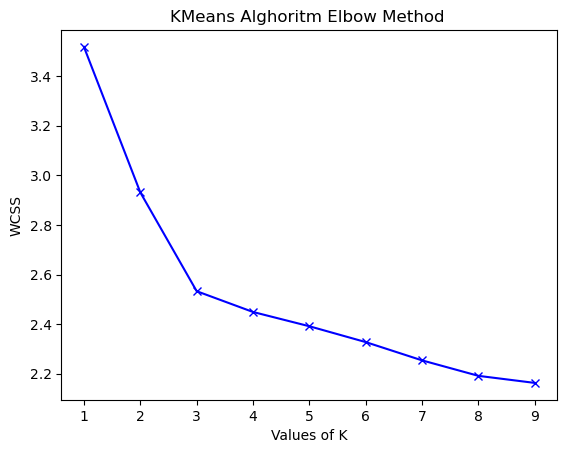

In [6]:
elbowList = []
map1 = {}
#elbowList = 1/n * sum(distance(point, centers)^2)
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=10).fit(X) #creating model
    kmeanModel.fit(X) #training model
    elbowList.append(sum(np.min(cdist(X,kmeanModel.cluster_centers_ , 'euclidean'),axis=1))/X.shape[0])
    map1[k]=sum(np.min(cdist(X,kmeanModel.cluster_centers_,'euclidean'),axis=1))/ X.shape[0]
    
plt.plot(K,elbowList, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('WCSS')
plt.title('KMeans Alghoritm Elbow Method ')
plt.show()

From graph K should be 3

## K-Means Training 

In [7]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.cluster_centers_

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796]])

In [8]:
centers=pca.transform(kmeans.cluster_centers_)
centers

array([[ 2.2761936 , -0.93205403],
       [-0.03695661,  1.77223945],
       [-2.72003575, -1.12565126]])

## Plotting centers and datas 

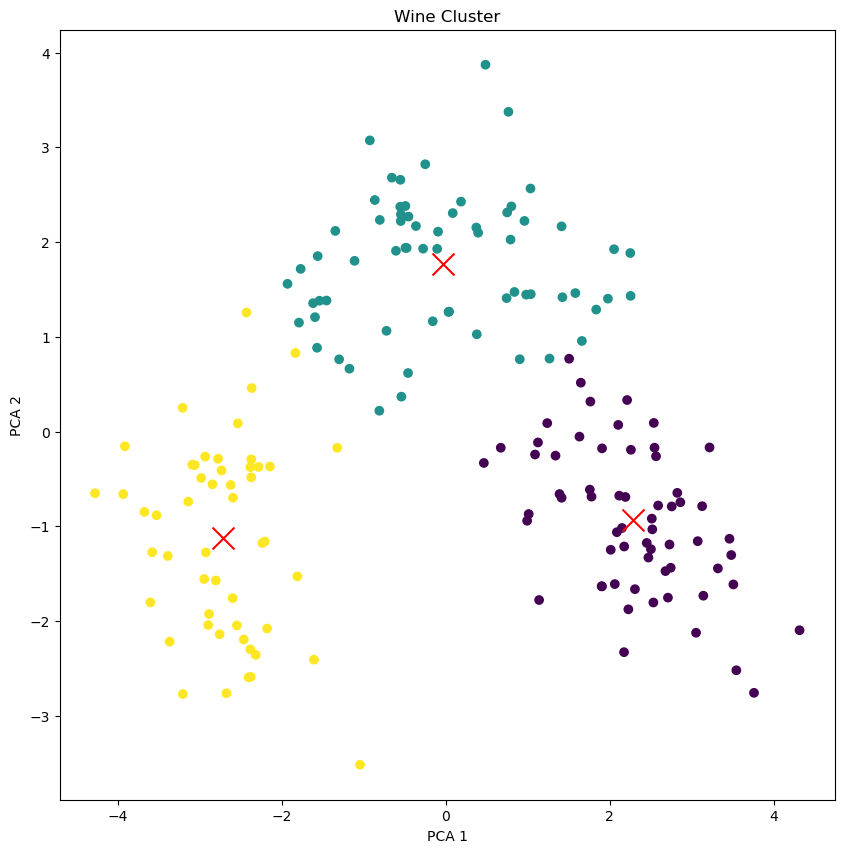

In [9]:
plt.figure(figsize=(10,10))
 
plt.scatter(reduced_data['PCA 1'],reduced_data['PCA 2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=250,c='red')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Wine Cluster')
plt.show()

## PCA Heatmap 

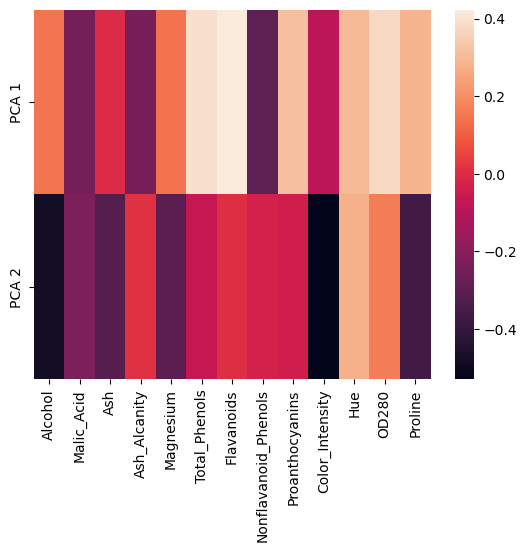

In [10]:
component_df=pd.DataFrame(pca.components_,index=['PCA 1',"PCA 2"],columns=data.columns)
sns.heatmap(component_df)
plt.show()

# DBSCAN

## Finding best epsilon and min values 

Best Epsilon: 2.34
Best Min Samples: 3
Best Silhouette Score: 0.14470255483561864


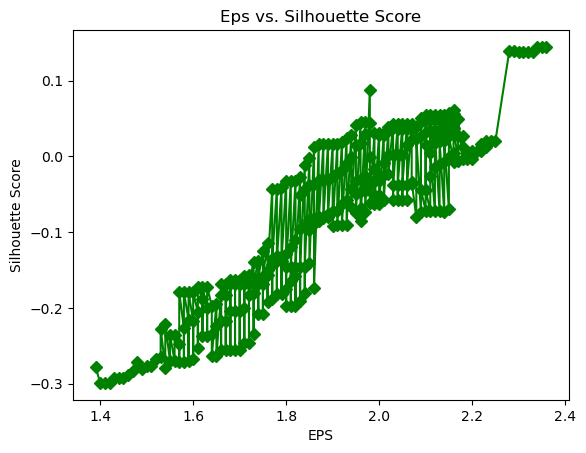

In [11]:
a = list(range(1,1000))
eps_values = []
for i in a:
    eps_values.append(i / 100)
eps_values
min_samples_values = list(range(3,10))

best_eps = None
best_min_samples = None
best_silhouette = -1.0
silhouette_values = []
silhouette_eps = []
# Iterate through different epsilon and min_samples values
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(scaled_df)
        
        # Check if more than one cluster is formed
        if len(np.unique(dbscan.labels_)) > 3:
            labels = dbscan.labels_
            silhouette = silhouette_score(scaled_df, labels)
            silhouette_values.append(silhouette)
            silhouette_eps.append(eps)
            # Check if silhouette score is better than the current best
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_eps = eps
                best_min_samples = min_samples

# Print the best parameters and silhouette score
print(f"Best Epsilon: {best_eps}")
print(f"Best Min Samples: {best_min_samples}")
print(f"Best Silhouette Score: {best_silhouette}")

plt.plot(silhouette_eps, silhouette_values, '-gD')
plt.xlabel('EPS')
plt.ylabel('Silhouette Score')
plt.title('Eps vs. Silhouette Score')
plt.show()


## Plotting DBSCAN datas 

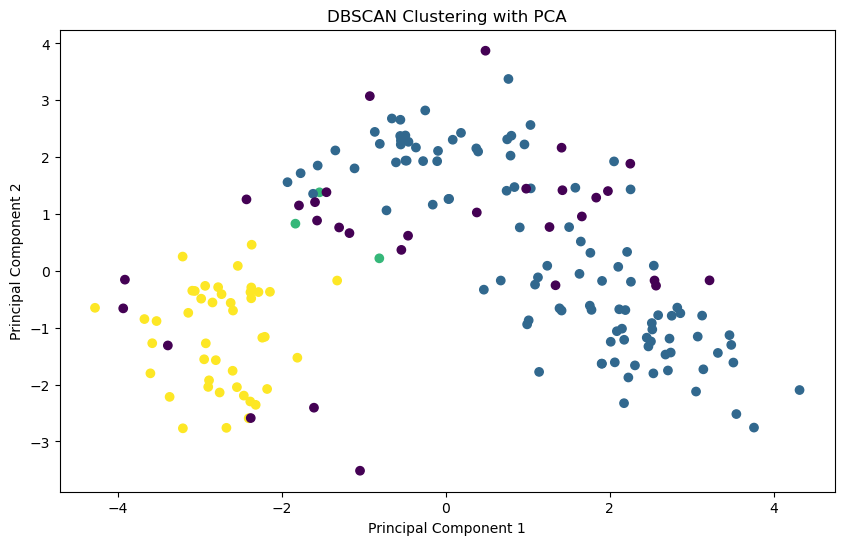

In [12]:
best_eps = 2.34
best_min_samples = 3

best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_dbscan.fit(scaled_df)
data['cluster'] = best_dbscan.labels_
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data['PCA 1'],reduced_data['PCA 2'], c=data['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering with PCA')
plt.show()